# Technical Seminar - Yoga Pose Estimation
# - SHIKHA N (1BM18CS149)


## Import dependencies

In [1]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Declare variables

In [2]:
mp_pose = mp.solutions.pose #Get the blazepose model
mp_draw = mp.solutions.drawing_utils # For drawing keypoints
points = mp_pose.PoseLandmark # Landmarks
columns = []
for p in points:
        x = str(p)[13:]
        columns.append(x + "_x")
        columns.append(x + "_y")
        columns.append(x + "_z")
        columns.append(x + "_vis")
columns.append('Target')
data = pd.DataFrame(columns = columns) # Empty dataset
test = False

## Function to detect pose

In [3]:
def detectPose(image, pose):
    
    # Color image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # Make detection
    results = pose.process(image)

    temp = []
    
    # Recolor image back to BGR
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    if results.pose_landmarks:

        # Render detections
        mp_draw.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        landmarks = results.pose_landmarks.landmark

        for i,j in zip(points,landmarks):
            temp = temp + [j.x, j.y, j.z, j.visibility]

    return image, temp

## Preparing the dataset

In [ ]:
# detecting pose in an image
t = ["downdog","tree","warrior2"]
for target in t:
    df = pd.DataFrame(columns=columns)
    print(target+" starting..")
    if test:
        path = "DATASET/TEST/" + target
    else:
        path = "DATASET/TRAIN/" + target
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

    # For each image in the directory perform detection
    for count,img in enumerate(os.listdir(path)):
        image = cv2.imread(path + "/" + img)
        _,temp = detectPose(image,pose)
        if temp!=[]:
            temp.append(target)
            df.loc[count] = temp
    data = data.append(df,ignore_index=True)

In [ ]:
# Save dataframes to csv
data.to_csv("train_dataset.csv", index = False)

test = True
data = pd.DataFrame(columns = columns)
data.to_csv("test_dataset.csv", index = False)

## SVM Model to classify pose

In [4]:
train_data = pd.read_csv("train_dataset.csv")
test_data=pd.read_csv("test_dataset.csv")
final_df = train_data.append(test_data,ignore_index=True)
final_df

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,Target
0,0.441700,0.694201,-0.096439,0.997566,0.416444,0.695569,-0.137276,0.998209,0.413817,0.691103,...,0.413311,0.825927,0.860303,-0.317801,0.972257,0.809430,0.840739,0.287854,0.439358,downdog
1,0.375681,0.698162,-0.107649,0.990680,0.355074,0.680854,-0.152594,0.994109,0.354026,0.676205,...,0.457589,0.770906,0.910949,-0.242096,0.977082,0.758387,0.892177,0.341211,0.453720,downdog
2,0.415092,0.678437,-0.035257,0.999260,0.389374,0.683943,-0.078691,0.999429,0.385444,0.680806,...,0.467491,0.833564,0.854598,-0.030145,0.969620,0.821841,0.834830,0.436641,0.540311,downdog
3,0.572214,0.532797,-0.121105,0.999968,0.556868,0.558700,-0.168262,0.999976,0.554940,0.558721,...,0.652442,0.765417,0.854516,-0.209655,0.964131,0.530205,0.734180,0.113064,0.646947,downdog
4,0.607926,0.708455,-0.065062,0.999852,0.623177,0.714925,-0.049365,0.999811,0.624679,0.713208,...,0.997850,0.382435,0.913913,0.310582,0.849778,0.372350,0.932190,-0.056707,0.996489,downdog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0.419771,0.367090,-0.126604,0.999937,0.425831,0.353692,-0.136543,0.999728,0.428142,0.353013,...,0.989785,0.672617,0.864790,-0.109651,0.979684,0.238494,0.865636,-0.004015,0.983611,warrior2
873,0.555526,0.234087,-0.395540,0.999943,0.552682,0.219081,-0.343790,0.999880,0.554843,0.219507,...,0.923680,0.802219,0.869774,-0.168699,0.945617,0.028604,0.872246,-0.046902,0.976663,warrior2
874,0.443884,0.204245,-0.625593,0.999920,0.461808,0.175307,-0.608478,0.999628,0.474617,0.174957,...,0.993865,0.842243,0.908856,-0.374400,0.988597,0.285900,0.908747,-0.094598,0.993461,warrior2
875,0.380229,0.017395,-0.353319,0.991644,0.390483,-0.008246,-0.342017,0.980271,0.397457,-0.008674,...,0.808316,1.012770,1.144832,-0.143035,0.800498,0.282583,1.095337,-0.230701,0.782298,warrior2


In [5]:
# Fitting data into SVC

X,y = final_df.iloc[:,:132],final_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = SVC(kernel = 'poly')
model.fit(X_train.values,y_train)

SVC(kernel='poly')

## Evaluating Performance

In [6]:
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions)*100)

96.02272727272727


In [7]:
print(confusion_matrix(y_test,predictions))

[[58  0  0]
 [ 1 50  2]
 [ 0  4 61]]


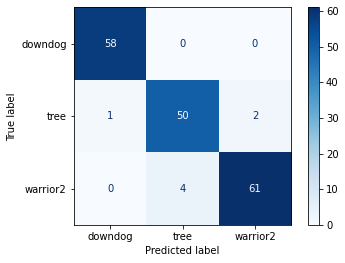

In [8]:
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["downdog","tree","warrior2"],
                                 cmap=plt.cm.Blues)
plt.show()

In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     downdog       0.98      1.00      0.99        58
        tree       0.93      0.94      0.93        53
    warrior2       0.97      0.94      0.95        65

    accuracy                           0.96       176
   macro avg       0.96      0.96      0.96       176
weighted avg       0.96      0.96      0.96       176



## Some Examples

In [20]:
def test_model(path,pose):
    image = cv2.imread(path)
    output,temp = detectPose(image,pose)
    if(temp!=[]):
        y_pred = model.predict([temp])
        cv2.putText(output,y_pred[0],(50,50),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),3)
        plt.figure(figsize=[10,10])
        plt.imshow(output[:,:,::-1]);plt.title("Yoga Pose Detected");plt.axis('off');
    else:
        print("Unknown Pose")

In [11]:
# Pose estimation in images
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
asana1 = "DATASET/TEST/downdog/00000064.jpg"
asana2 = "DATASET/TEST/warrior2/00000033.jpg"
asana3 = "DATASET/TEST/tree/00000027.jpg"
asana4 = "warrior1_pose.jpg"
asana5 = "DATASET/TEST/tree/00000017.jpg"
# asana5 = "tree_pose.jpg"
asana6 = "dog_pose.jpg"

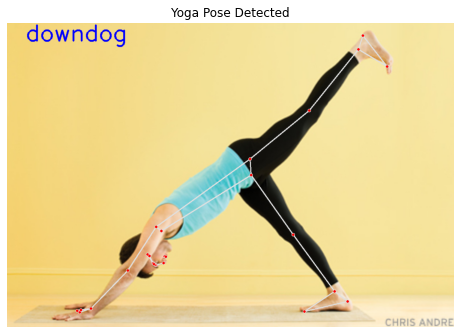

In [21]:
test_model(asana1,pose)

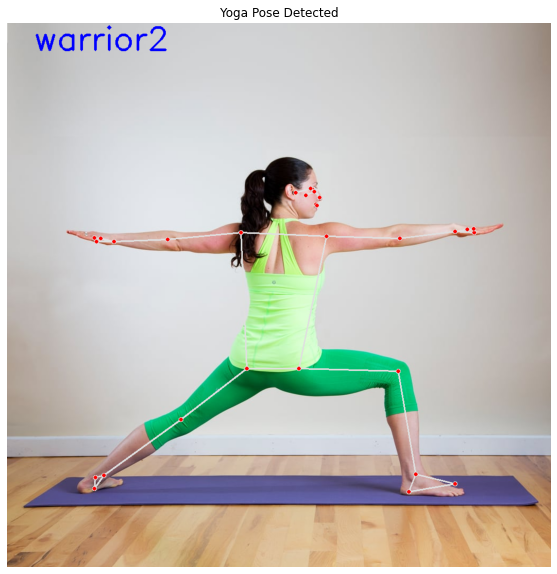

In [15]:
test_model(asana2,pose)

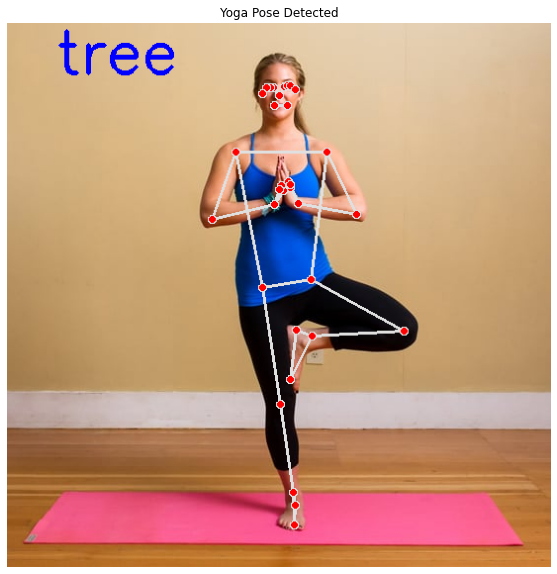

In [16]:
test_model(asana3,pose)

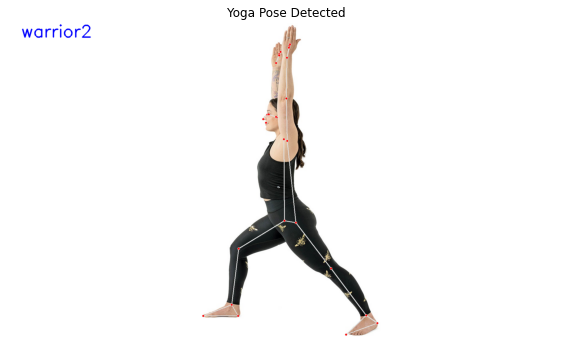

In [17]:
test_model(asana4,pose)

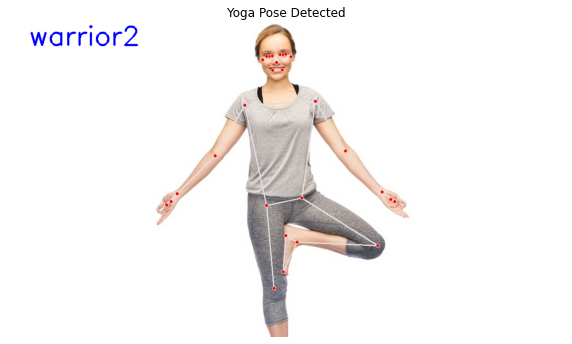

In [18]:
test_model(asana5,pose) #Actual pose - Tree

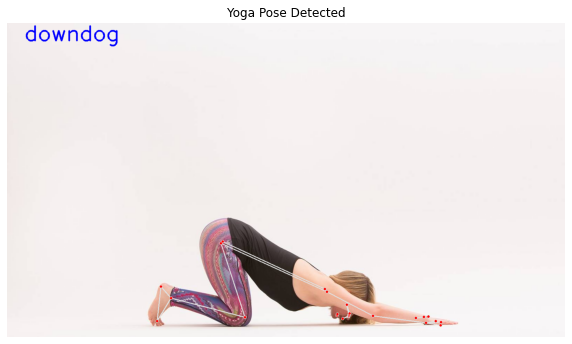

In [19]:
test_model(asana6,pose)

## Real time pose detection

In [ ]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret,frame = cap.read()
        
        # Color image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor image back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_draw.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        
        cv2.imshow('Yoga Feed', image)

        if cv2.waitKey(10) & 0xFF==ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()